In [1]:
import pandas as pd
import numpy as np
import sys
import os

import time, enum, math
import pylab as plt
import random
import warnings
warnings.filterwarnings('ignore')

from state import State
from Agent import MyAgent
from NetworkInformationDiffusionModel import NetworkInformationDiffusionModel
# from Visualization import Visualization
from Data import Data
import seaborn as sns

import networkx as nx
from numba import jit

import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')

def get_data_plot_grid(df):

    fig = plt.figure(figsize=(25, 3))
    #fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, 6, 1)
    # sns.distplot(df.activity,ax=ax)
#     ax = fig.add_subplot(2, 6, 2)
#     sns.distplot(df.pol_interest,ax=ax)
#     ax = fig.add_subplot(2, 6, 3)
#     sns.distplot(df.privacy_preference,ax=ax)
    # ax = fig.add_subplot(2, 6, 2)
    # sns.distplot(df.pol_inclination,ax=ax)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax = fig.add_subplot(1, 6, 1)
    sns.distplot(df.topic_1,ax=ax)
    ax = fig.add_subplot(1, 6, 2)
    sns.distplot(df.topic_2,ax=ax)
    ax = fig.add_subplot(1, 6, 3)
    sns.distplot(df.topic_3,ax=ax)
    ax = fig.add_subplot(1, 6, 4)
    sns.distplot(df.topic_4,ax=ax)
    ax = fig.add_subplot(1, 6, 5)
    sns.distplot(df.topic_5,ax=ax)
    ax = fig.add_subplot(1, 6, 6)
    sns.distplot(df.topic_6,ax=ax)
    plt.show()

In [3]:
data = np.clip(np.random.normal(0, 0.5, (100, 6)), -1, 1)
df = pd.DataFrame(data, columns = [f'topic_{i}' for i in range(1,7)])

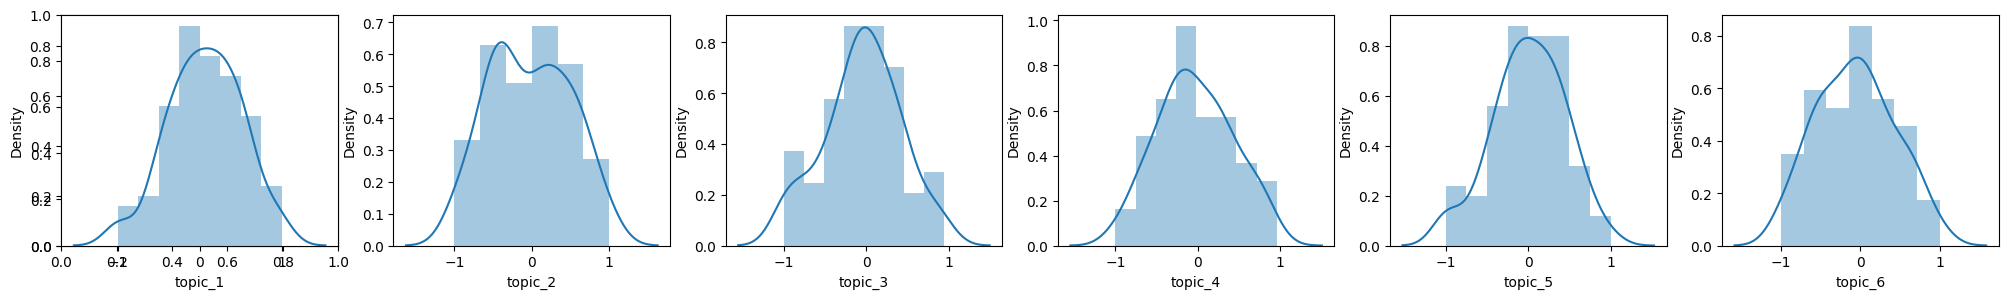

In [4]:
get_data_plot_grid(df)

In [5]:
data = np.clip(np.random.normal(0, 0.5, (100, 6)), -1, 1)
data[:50, :3] = np.abs(data[:50, :3])  
data[:50, 3:] = -np.abs(data[:50, 3:])  
data[50:, :3] = -np.abs(data[50:, :3])  
data[50:, 3:] = np.abs(data[50:, 3:])  

df = pd.DataFrame(data, columns=[f"topic_{i+1}" for i in range(6)])


news_stances = [np.array([0, 0, 0, 0, 0, 0]),
                np.array([1, 1, 1, -1, -1, -1]),  
                np.array([-1, -1, -1, 1, 1, 1]),  
                ]  

# influencer_stances = [np.array([1, 1, 1, -1, -1, -1])] * 2 + \
#                      [np.array([-1, -1, -1, 1, 1, 1])] * 2 + \
#                      [np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])] * 3  
 
for i, stance in enumerate(news_stances, start=100):
    df.loc[i] = stance  
    
# for i, stance in enumerate(news_stances, start=97):
#     df.loc[i] = stance 

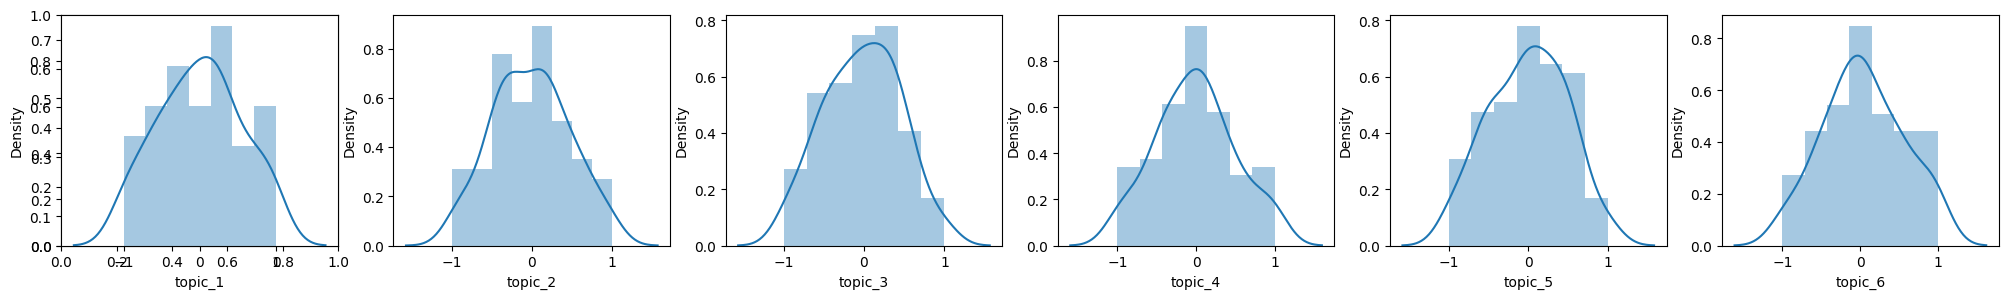

In [6]:
get_data_plot_grid(df)

In [7]:
from scipy.stats import shapiro
stat, p = shapiro(df.topic_6)
stat, p

(0.979356586933136, 0.10755051672458649)

<AxesSubplot: ylabel='Density'>

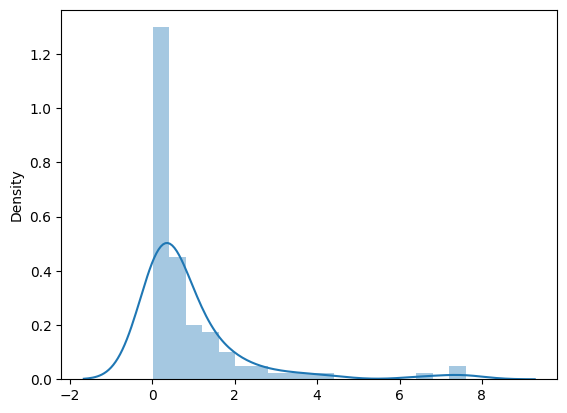

In [8]:
sns.distplot(pd.Series(np.random.pareto(a=2, size=100)))

In [9]:
# s = pd.Series(np.random.pareto(a=2, size=100))
# s = s.clip(0, 1).tolist()
n = 100           # number of samples
alpha = 2.5        # power-law exponent
s = 1-np.random.power(alpha, n)
s = s.tolist() + [1] * 3

df['privacy'] = s
df['activity'] = s
df['satisfaction'] = [0] * 103

In [10]:
import pandas as pd
import numpy as np

def power_law_series(n, alpha, x_min=1):
    """
    Generates a Pandas Series with a power law distribution.

    Args:
        n (int): Number of data points.
        alpha (float): Exponent of the power law distribution.
        x_min (float, optional): Minimum value of the distribution. Defaults to 1.

    Returns:
        pd.Series: Pandas Series with power law distributed values.
    """
    r = np.random.uniform(size=n)
    values = (x_min) * (1 - r)**(-1/(alpha - 1))
    return pd.Series(values)

# Example usage:
n = 1000
alpha = 2.5
series = power_law_series(n, alpha)

# Display the first few values and data type
print(series.head())
print(series.dtype)

0    1.317749
1    1.042891
2    1.734174
3    6.567741
4    1.206837
dtype: float64
float64


In [11]:
n = 100           # number of samples
alpha = 2.5        # power-law exponent

# Generate power-law samples between 0 and 1
samples = 1-np.random.power(alpha, n)

<AxesSubplot: ylabel='Density'>

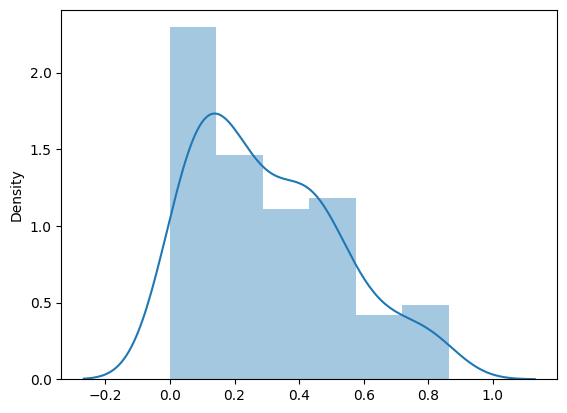

In [12]:
# s = pd.Series(1 - np.random.pareto(a=2, size=100))
s = pd.Series(np.random.pareto(a=2, size=100))
# s = s.clip(0, 1).tolist()
sns.distplot(samples)

In [13]:
import pandas as pd
import numpy as np

# low = np.random.beta(2, 8, 50)  # Intolerant users (values near 0)
# high = np.random.beta(8, 2, 50)  # Tolerant users (values near 1)

low = np.random.beta(5, 5, 100)
high = 2-low

# s = pd.Series(np.hstack([low, high]))  # Combine both distributions
# s1 = 1-s

In [14]:
df['lat_acc'] = low.tolist() + [0] * 3 
df['lat_rej'] = high.tolist() + [1] * 3 

In [15]:
# x = np.linspace(0, 1, 100)
# a = x**0.5 * 2        # skewed toward higher values
# b = 2 - a 

a = np.random.beta(2, 5, 50)
b = 2-a


# a = (np.random.pareto(a=2.0, size=100) + 1)  # shape parameter α > 1
# a = 2 * a / a.max()  # scale so that max is 2
# b = 2 - a

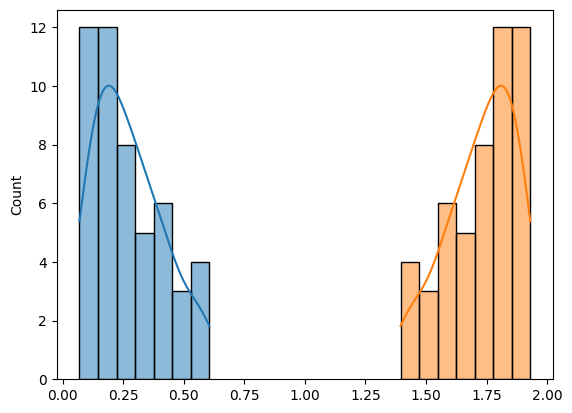

In [16]:
sns.histplot(a, kde=True)  
sns.histplot(b, kde=True) 
plt.show()

In [17]:
# sns.histplot(df.lat_rej, kde=True)  
# sns.histplot(df.lat_acc, kde=True) 
# plt.show()

In [18]:
df['id'] = df.index.tolist()

In [19]:
# targets2 = np.random.choice(range(45, 90), size=10, replace=False)
# np.array(targets.tolist() + targets2.tolist())

In [20]:
# df = initial_data[['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'privacy', 'activity', 'satisfaction', 'lat_acc', 'lat_rej']]
df['pol_inclination'] = (df[['topic_1', 'topic_2', 'topic_3']].mean(axis=1) - df[['topic_4', 'topic_5', 'topic_6']].mean(axis=1))/2

In [21]:
i = 10
df.to_csv(f'initial_data/initial_data_{i}.csv')
sys.exit()

SystemExit: 

In [ ]:
# chosen_row = df.sample(weights=df['pol_inclination'], random_state=42)

In [ ]:
# grp1 = df.iloc[0:50]
# grp2 = df.iloc[50:100]

# np.array(grp2.sample(30, weights = -1 * grp2['pol_inclination'], random_state=42).index.tolist() + grp1.sample(10, random_state=42).index.tolist())
# np.array(grp1.sample(30, weights = grp1['pol_inclination'], random_state=42).index.tolist() + grp2.sample(10, random_state=42).index.tolist())
# grp1.sample(30, weights = grp1['pol_inclination'], random_state=42).index

In [ ]:
# df[df.pol_inclination == 0].shape

In [ ]:
# df.sample(20, weights = 1-df.pol_inclination.abs()).pol_inclination.mean()

# grp1.sample(18, weights = grp1['pol_inclination']).pol_inclination.mean()

In [ ]:
# df.iloc[90:100]

In [ ]:
# node_attr = df.set_index('id').to_dict('index')
# nx.set_node_attributes(G, node_attr)

In [28]:
import matplotlib.pyplot as plt

def plot_graph(G):

    color_map = ['red'] * 50 + ['blue'] * 50 + ['orange', 'green', 'brown']  # Regular, Influential, Superinfluential

    indegrees = [G.degree(n) * 10 for n in G.nodes()]  # Scale for visibility

    pos = nx.spring_layout(G)
    # sns.set_style("white")
    # nx.draw(G, pos, with_labels=True)
    # plt.show()

    plt.figure(figsize=(8, 8))
    nx.draw(G, node_color=color_map, with_labels=False, edge_color="gray", node_size=indegrees)
    plt.show()

In [63]:
i = 10
df = pd.read_csv(f'initial_data/initial_data_{i}.csv')

In [64]:
import networkx as nx
import numpy as np
import pandas as pd

# Regular people: Small-world network (resembles real social networks)
G = nx.watts_strogatz_graph(100, k=6, p=1)

# Influential people: Scale-free model (captures power-law degree distribution)
# influential = range(90, 100)
G.add_nodes_from([100, 101, 102])

grp1 = df.iloc[0:50]
grp2 = df.iloc[50:100]

node_attr = df.set_index('id').to_dict('index')
nx.set_node_attributes(G, node_attr)

# # Connect influential nodes (preferential attachment)
# for i in range(90, 92):
#     targets = grp1.sample(18, weights = grp1['pol_inclination'], random_state=42).index.tolist() + grp2.sample(2, random_state=42).index.tolist()
    
#     # targets = np.random.choice(range(45), size=20, replace=False)
#     G.add_edges_from([(i, t) for t in targets])
    
# for i in range(92, 94):
#     # targets1 = np.random.choice(range(45, 90), size=15, replace=False)
#     targets = grp2.sample(18, weights = -1 * grp2['pol_inclination'], random_state=42).index.tolist() + grp1.sample(2, random_state=42).index.tolist()
#     # targets2 = np.random.choice(range(45), size=15, replace=False)
#     # targets = np.array(targets1.tolist() + targets2.tolist())
#     G.add_edges_from([(i, t) for t in targets])

# for i in range(94, 97):  # Superinfluential nodes
#     targets = df.sample(20, weights = 1-df.pol_inclination.abs(), random_state=42).index.tolist()
#     G.add_edges_from([(i, t) for t in targets])
 
    
user_df = df.iloc[0:100]
targets = user_df.sample(20, weights = 1-user_df.pol_inclination.abs(), random_state=42).index.tolist()
G.add_edges_from([(100, t) for t in targets])
    
# targets = np.random.choice(range(45), size=30, replace=False) 
targets = grp1.sample(16, weights = grp1['pol_inclination'], random_state=42).index.tolist() + grp2.sample(4, random_state=42).index.tolist()
G.add_edges_from([(101, t) for t in targets])

# targets = np.random.choice(range(45, 90), size=30, replace=False)
targets = grp2.sample(16, weights = -1 * grp2['pol_inclination'], random_state=42).index.tolist() + grp1.sample(4, random_state=42).index.tolist()
G.add_edges_from([(102, t) for t in targets])

# targets = np.random.choice(range(90), size=30, replace=False)
# Node attributes in DataFrame
# df = pd.DataFrame({'node': list(G.nodes), 'feature': np.random.rand(100)})

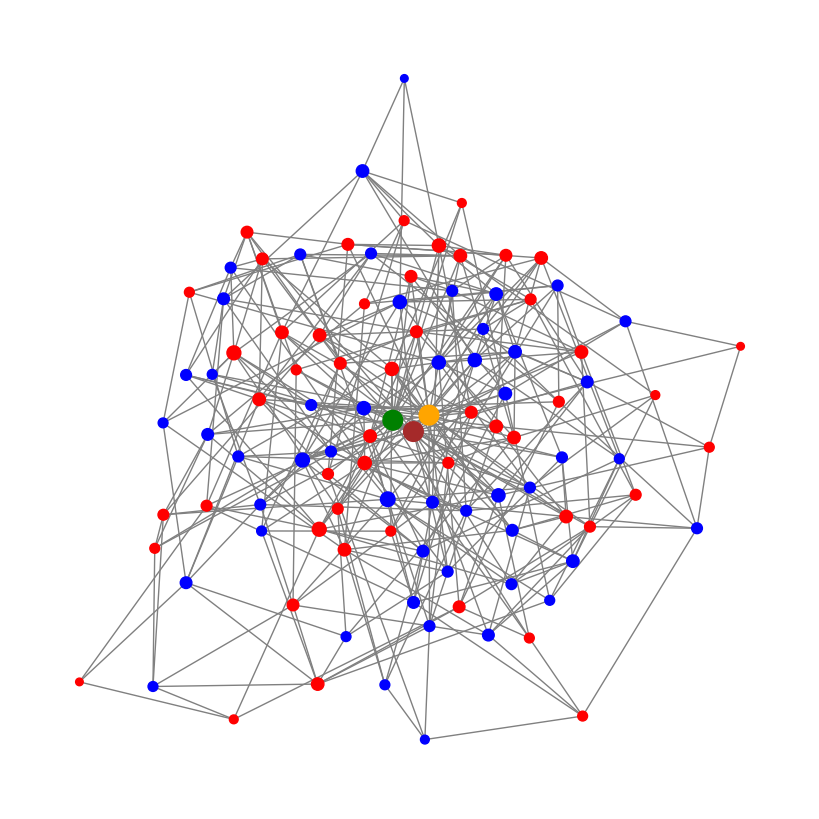

In [65]:
node_attr = df.set_index('id').to_dict('index')
nx.set_node_attributes(G, node_attr)

plot_graph(G)

In [66]:
import pickle

# Save graph using pickle
with open(f'initial_data/graph{i}.pkl', 'wb') as f:
    pickle.dump(G, f)

In [58]:
# # import pandas as pd
# # import numpy as np

# # s = pd.Series(1 - np.random.pareto(a=2, size=90))
# # # s = s.clip(0, 1)  # Ensure values stay within [0,1]

# import pandas as pd
# import numpy as np

# s = pd.Series(1 - np.random.pareto(a=2, size=90))
# s = s.clip(0, 1)  # Ensure values stay within [0,1]

# # s = pd.Series(np.random.pareto(a=2, size=100))
# import seaborn as sns  
# import matplotlib.pyplot as plt  

# sns.histplot(s1, kde=True)  
# plt.show()

In [ ]:
data = df.iloc[0:10].copy()

In [ ]:
import numpy as np

def plot(G):

    indegrees = [G.degree(n) * 10 for n in G.nodes()]  # Scale for visibility
    pos = nx.spring_layout(G)
    plt.figure(figsize=(4, 4))
    nx.draw(G, with_labels=True, edge_color="gray", node_size=indegrees)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

In [ ]:
data = df.sample(10)

data['tolerance'] = data['lat_rej'] - data['lat_acc']
data

In [ ]:
# G = None
# import pickle
# with open('graph.pkl', 'rb') as f:
#     G = pickle.load(f)

G = nx.Graph()

nodes = list(range(10))
# edges = [(x,y) for x, y in zip(list(np.random.randint(0, 10, (1,30))[0]), list(np.random.randint(0, 10, (1,30))[0])) if x!=y]
edges = [(0,1), (1,7), (2,3), (3,4), (7,8), (0,4)]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

plot(G)

In [ ]:
plot(G)

In [ ]:
import networkx as nx
from collections import defaultdict

# Mockup: Create 10 directed graphs with weighted edges
def create_sample_graphs():
    graphs = []
    for i in range(10):
        G = nx.DiGraph()
        G.add_weighted_edges_from([
            ('A', 'B', 1 + i),
            ('B', 'C', 2 + i),
            ('C', 'A', 3 + i),
            ('A', 'D', 4 + i if i % 2 == 0 else 0),  # Edge A->D appears in only half of graphs
        ])
        graphs.append(G)
    return graphs

# Aggregation function
def aggregate_graphs_mean_weight(graphs):
    edge_weights = defaultdict(list)

    for G in graphs:
        for u, v, data in G.edges(data=True):
            weight = data.get('weight', 1.0)
            edge_weights[(u, v)].append(weight)

    aggregated = nx.DiGraph()
    for (u, v), weights in edge_weights.items():
        mean_weight = sum(weights) / len(weights)
        aggregated.add_edge(u, v, weight=mean_weight)

    return aggregated

# Create sample graphs and aggregate them
graphs = create_sample_graphs()
agg_graph = aggregate_graphs_mean_weight(graphs)

# Preview aggregated graph edges and weights
agg_edges = list(agg_graph.edges(data=True))
agg_edges

In [ ]:
from collections import deque

def add_edges(G, data):
    
    visited = set()
    add_edges = []
    nodes = set(range(len(data)))
    
    q = deque([nodes.pop()])
    
    while len(nodes) > 0:
        
        if len(q) == 0:
            q.append(nodes.pop())
        cur = q.popleft()
            
        if cur not in visited:
            cur_polInc = data.iloc[cur]['pol_inclination']
            edges = list(G.edges(cur)).copy()
            for edge in edges:
                neighbor = edge[1]
                if neighbor not in visited:
                    q.append(neighbor)
                    visited.add(neighbor)
                    
                    neighbors = list(G.edges(neighbor)).copy()
                    # print(cur, neighbors, q)
                    for n_edges in neighbors:
                        n = n_edges[1]
                        neigh_data = data.iloc[n]
                        neigh_polInc = neigh_data['pol_inclination']
                        tolerance = neigh_data['lat_rej'] - neigh_data['lat_acc']
                        
                        # print(cur, n, cur_polInc, neigh_polInc, tolerance)
                        if abs(cur_polInc - neigh_polInc) < tolerance and cur != n:
                            add_edges.append((cur, n))
                        
    G.add_edges_from(add_edges)
    return G


def sever_edges(G, data):
    
    visited = set()
    remove_edges = []
    nodes = set(range(len(data)))
    
    q = deque([nodes.pop()])
    
    while len(nodes) > 0:
        
        if len(q) == 0:
            q.append(nodes.pop())
        cur = q.popleft()
        
        if cur not in visited:
            cur_polInc = data.iloc[cur]['pol_inclination']
            edges = list(G.edges(cur)).copy()
            for edge in edges:
                neighbor = edge[1]
                if neighbor not in visited:
                    q.append(neighbor)
                    visited.add(neighbor)
                    neigh_data = data.iloc[neighbor]
                    neigh_polInc = neigh_data['pol_inclination']
                    tolerance = neigh_data['lat_rej'] - neigh_data['lat_acc']
                    if abs(cur_polInc - neigh_polInc) > tolerance:
                        remove_edges.append((cur, neighbor))
                        
    G.remove_edges_from(remove_edges)
    return G

In [ ]:
G = add_edges(G, data)

In [ ]:
plot(G)

In [ ]:
plot(G_)

In [ ]:
data.iloc[2,12] = -1 * data.iloc[2,12]
data

In [ ]:
# import pandas as pd
# import numpy as np

# data = np.clip(np.random.normal(0, 0.5, (100, 6)), -1, 1)
# data[:50, :3] = np.abs(data[:50, :3])  # First half supports first 3 topics
# data[:50, 3:] = -np.abs(data[:50, 3:])  
# data[50:, :3] = -np.abs(data[50:, :3])  # Second half supports last 3 topics
# data[50:, 3:] = np.abs(data[50:, 3:])  

# df = pd.DataFrame(data, columns=[f"topic_{i+1}" for i in range(6)])

In [ ]:
G.degree

In [ ]:
import pandas as pd
import numpy as np

data = np.clip(np.random.normal(0, 0.5, (100, 6)), -1, 1)
data[:, 3:] = -np.abs(data[:, 3:])  # Ensure support for last 3 topics

df = pd.DataFrame(data, columns=[f"topic_{i+1}" for i in range(6)])

In [ ]:
df.to_csv('initial_data_new.csv')

In [ ]:
sorted_nodes = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
print(sorted_nodes)

In [ ]:
def creat_social_network(edges):

    G = nx.Graph()
    lines = edges.split("\n")
    for e in lines:
        nodes = e.split()
        if(len(nodes) > 1):
            if(nodes[0] not in G):
                G.add_node(nodes[0])
            if(nodes[1] not in G):
                G.add_node(nodes[1])

            G.add_edge(nodes[0], nodes[1])

    return G

def get_fb_network(df):

    fb_network = open('facebook_combined.txt', 'r').read()
    G = creat_social_network(fb_network)
    A = nx.adjacency_matrix(G).todense()
    A = np.array(A)
    n = A.shape[0]
    G = nx.from_numpy_matrix(A)

    node_attr = df.set_index('id').to_dict('index')
    nx.set_node_attributes(G, node_attr)

    return G

In [ ]:
fb_network = open('facebook_combined.txt', 'r').read()
G = creat_social_network(fb_network)

num_nodes = G.number_of_nodes()       # Total nodes
num_edges = G.number_of_edges()       # Total edges
degree_dict = dict(G.degree())        # Node degrees
avg_clustering = nx.average_clustering(G)  # Clustering coefficient
diameter = nx.diameter(G) if nx.is_connected(G) else None  # Diameter
density = nx.density(G)  

# Print results
print(f"Nodes: {num_nodes}, Edges: {num_edges}")
print(f"Average Clustering: {avg_clustering:.4f}")
print(f"Diameter: {diameter}, Density: {density:.4f}")

In [ ]:
import networkx as nx

# Create an example graph
G = nx.barabasi_albert_graph(100, 35)

# Basic properties
num_nodes = G.number_of_nodes()       # Total nodes
num_edges = G.number_of_edges()       # Total edges
degree_dict = dict(G.degree())        # Node degrees
avg_clustering = nx.average_clustering(G)  # Clustering coefficient
diameter = nx.diameter(G) if nx.is_connected(G) else None  # Diameter
density = nx.density(G)               # Graph density

# Print results
print(f"Nodes: {num_nodes}, Edges: {num_edges}")
print(f"Average Clustering: {avg_clustering:.4f}")
print(f"Diameter: {diameter}, Density: {density:.4f}")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# G = nx.barabasi_albert_graph(100, 10)  # Simulated Facebook-style network

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=False, node_size=50, edge_color="gray")
plt.show()

In [ ]:
# del plt.show
# import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_size=50, edge_color="gray")
plt.show()

In [ ]:
import networkx as nx
import random

def random_subnetwork(G, n):
    nodes = random.sample(G.nodes(), min(n, len(G)))
    return G.subgraph(nodes).copy()

# Example usage
G = nx.erdos_renyi_graph(100, 0.05)  # Example social network
subG = random_subnetwork(G, 20)  # Get a subnetwork with 20 nodes

In [ ]:
import networkx as nx
import pandas as pd
import random

# Create graph
G = nx.barabasi_albert_graph(10, 9)  # Influencers (high-degree)
G.add_edges_from(nx.watts_strogatz_graph(90, 4, 0.3).edges())  # Regular users (small-world)

# Connect regular users to influencers
for i in range(10, 100):
    influencer = random.choice(range(10))
    G.add_edge(i, influencer)

# Add agent properties from a DataFrame
df = pd.DataFrame({"id": range(100), "age": random.choices(range(18, 60), k=100)})
nx.set_node_attributes(G, df.set_index("id").to_dict("index"))

In [ ]:
G = nx.barabasi_albert_graph(10, 5)

In [ ]:
G.number_of_edges()

In [ ]:
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=False, node_size=50, edge_color="gray")
plt.show()

In [ ]:
k = 1
Data_obj = Data(k)
data_path = 'initial_data_' + str(k) + '.csv'
initial_data = pd.read_csv(data_path)
# initial_graph = get_fb_network(initial_data)

In [ ]:
initial_data